# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("bank.csv")

# Checking the data

In [3]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data_df.shape

(515, 6)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


# Remove the ID column

In [6]:
data_df = data_df.drop('Bank',axis=1)

# Missing Values

In [7]:
data_df.isnull().sum()

DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

# Checking Summary Statistic

In [8]:
data_df.describe()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000
mean,232.252427,150.693204,81.687379,2934.669903,598.603883
std,66.648815,56.897777,28.596912,437.062831,83.487891
min,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,291.000000,200.000000,105.000000,3300.000000,657.500000
max,350.000000,247.000000,212.000000,3650.000000,838.000000


# Checking for Duplicates

In [9]:
data_df.duplicated().sum()

0

There are no Duplicates in the dataset

# Exploratory Data Analysis

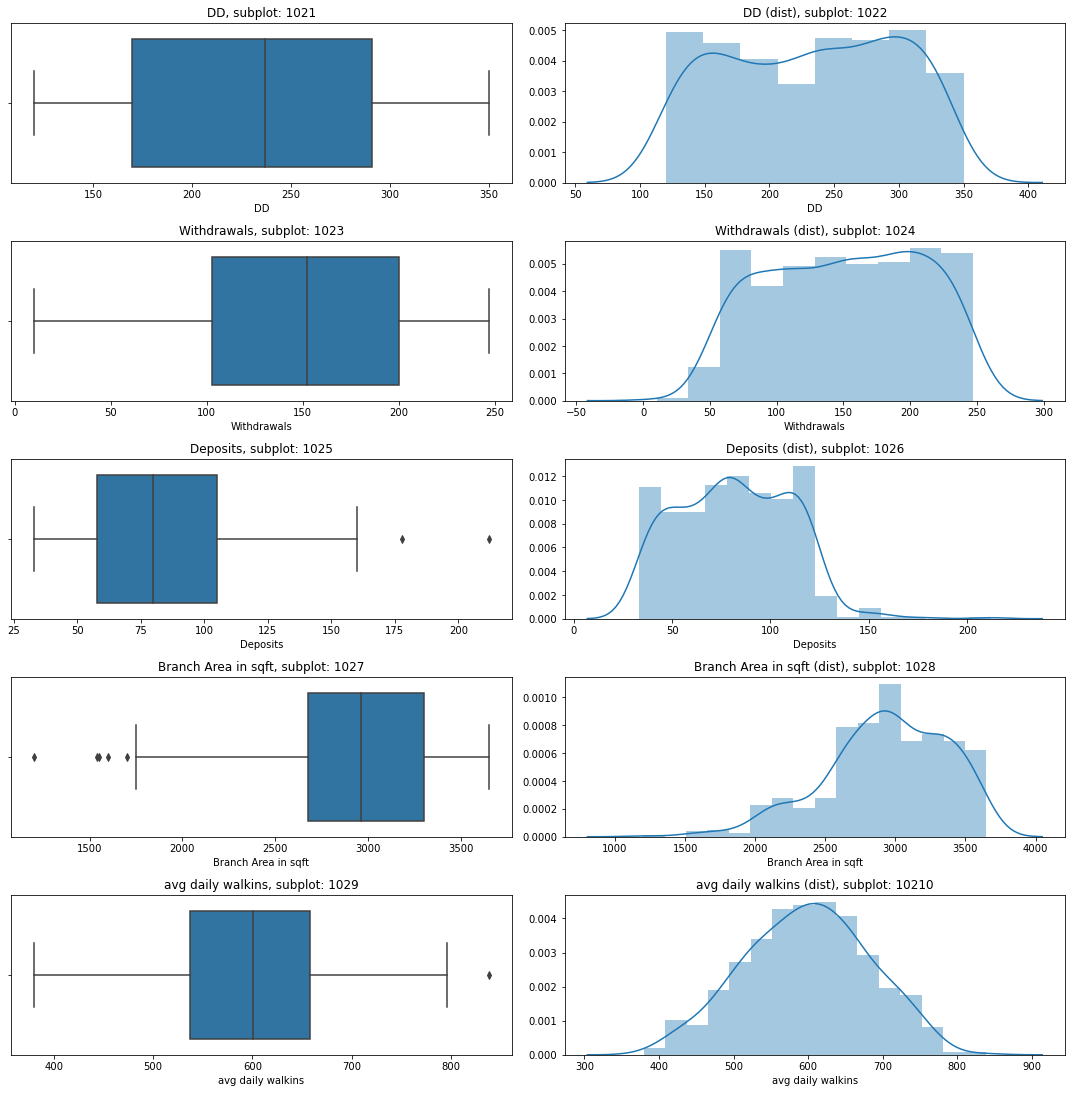

In [10]:
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 30)

for i in data_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data_df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data_df[i])
    c = c + 1

plt.tight_layout()
plt.show();

# Outliers Treatment

In [202]:
def treatoutliers(df):
    
    for col in df.columns:
        
        p99 = np.percentile(df[col],99)
        p1 = np.percentile(df[col],1)
        
        df[col] = np.where(df[col]<p1, p1,df[col])
        df[col] = np.where(df[col]>p99, p99,df[col])
    
    return df

In [203]:
# data_df = treatoutliers(data_df)

In [204]:
# a = 10  # number of rows
# b = 2  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize=(50,40))
# fig.set_size_inches(15, 30)

# for i in data_df.columns:
#     plt.subplot(a, b, c)
#     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.boxplot(data_df[i])
#     c = c + 1
    
#     plt.subplot(a, b, c)
#     plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.distplot(data_df[i])
#     c = c + 1

# plt.tight_layout()
# plt.show();

# Scaling the data

In [11]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [12]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [13]:
data_df.shape

(515, 5)

In [14]:
scaled_df = pd.DataFrame(X.fit_transform(data_df.iloc[:,0:6]),columns=data_df.columns[0:])

In [15]:
scaled_df.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039


In [16]:
scaled_df.describe()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02
mean,-1.345202e-16,-2.218290e-16,4.440892e-17,4.083034e-16,7.415859e-17
std,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00
min,-1.685875e+00,-2.475141e+00,-1.704195e+00,-3.972785e+00,-2.620936e+00
25%,-9.424540e-01,-8.390411e-01,-8.291248e-01,-5.947025e-01,-7.326008e-01
50%,7.130193e-02,2.298977e-02,-5.906299e-02,5.801163e-02,2.872807e-02
75%,8.823066e-01,8.674282e-01,8.160073e-01,8.366882e-01,7.061309e-01
max,1.768404e+00,1.694274e+00,4.561308e+00,1.638267e+00,2.870223e+00


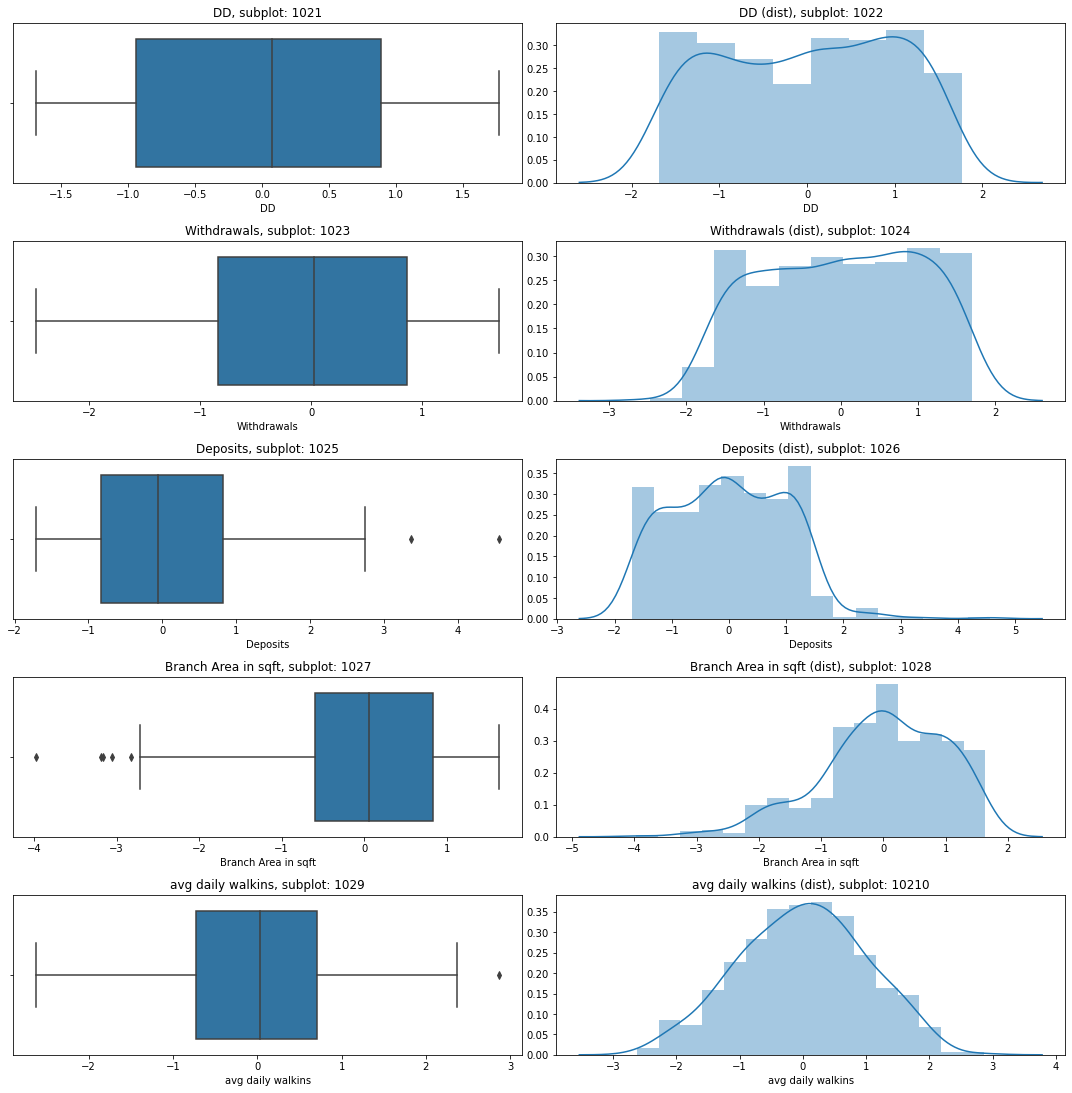

In [210]:
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 30)

for i in scaled_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(scaled_df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(scaled_df[i])
    c = c + 1

plt.tight_layout()
plt.show();

# Creating Clusters using KMeans

### Calculating WSS for other values of K - Elbow Method

In [17]:
wss =[] 

In [18]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [19]:
wss

[2574.9999999999964,
 1943.8528605836934,
 1593.911785316776,
 1375.4932875022535,
 1220.369350740576,
 1120.4945905518002,
 1024.270016297523,
 940.3763844042338,
 882.6680837803597,
 836.9697419038355]

In [20]:
a=[1,2,3,4,5,6,7,8,9,10]

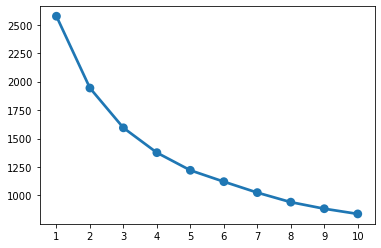

In [21]:
sns.pointplot(a, wss);

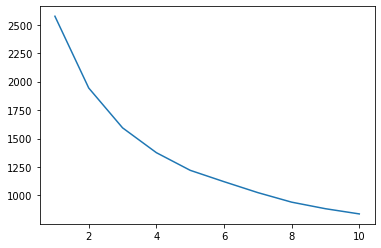

In [22]:
plt.plot(range(1,11), wss)

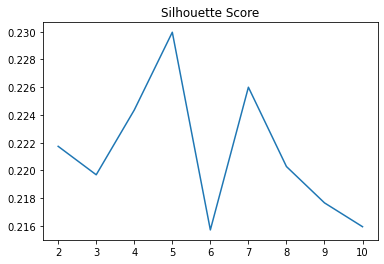

In [23]:
from sklearn.metrics import silhouette_score
# We will try to determine K based on the maximum silhouetter score:
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(scaled_df)
    ss.append([k,silhouette_score(scaled_df,kmeans.labels_,random_state=1)])

s_score=pd.DataFrame(ss)
plt.title("Silhouette Score")
plt.plot(s_score[0],s_score[1]);

https://www.kaggle.com/karthickaravindan/k-means-clustering-project

# KMeans with K=5

In [24]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [25]:
labels[:10]

array([4, 0, 2, 1, 4, 3, 0, 3, 2, 2])

### Cluster evaluation for 5 clusters: the silhouette score

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.22939762049755408

# KMeans with K=4

In [28]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [37]:
labels

array([2, 0, 2, 3, 0, 1, 0, 3, 2, 2, 1, 1, 1, 0, 3, 3, 1, 3, 1, 3, 0, 0,
       1, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0, 1, 2, 2, 1, 0, 2, 3, 1,
       1, 0, 2, 3, 1, 1, 0, 2, 2, 2, 0, 2, 1, 3, 1, 3, 3, 3, 3, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 0, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 0, 3, 1, 2, 1,
       0, 3, 3, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3,
       1, 0, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 2, 1, 0, 0, 3, 1, 3, 3, 0, 3,
       3, 2, 2, 1, 0, 1, 2, 1, 2, 1, 3, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2,
       1, 1, 3, 0, 1, 0, 1, 2, 2, 2, 2, 3, 0, 0, 2, 3, 0, 3, 3, 1, 1, 2,
       0, 2, 2, 0, 0, 0, 1, 1, 1, 3, 2, 0, 3, 0, 1, 1, 3, 3, 2, 1, 0, 1,
       2, 3, 0, 3, 3, 0, 2, 3, 1, 1, 1, 3, 3, 3, 3, 0, 3, 3, 1, 1, 3, 2,
       2, 0, 3, 3, 2, 0, 1, 1, 2, 1, 2, 1, 1, 3, 0, 2, 1, 1, 1, 3, 2, 1,
       2, 3, 1, 3, 1, 0, 2, 1, 1, 1, 1, 2, 3, 3, 0, 3, 1, 1, 2, 1, 3, 1,
       1, 3, 0, 0, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 3, 3, 2, 3, 0, 3, 3, 2, 1, 1, 2, 2,

### Cluster evaluation for 4 clusters

In [29]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
silhouette_score(scaled_df,labels,random_state=1)

0.22755082117068726

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [31]:
data_df["Clus_kmeans4"] = labels
data_df.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,227,147,111,2460,639,2
1,123,86,65,3510,436,0
2,306,149,76,2570,669,2
3,251,112,129,3650,623,3
4,174,135,128,3400,579,0


# Cluster Profiling

In [32]:
data_df.Clus_kmeans4.value_counts().sort_index()

0     97
1    149
2    130
3    139
Name: Clus_kmeans4, dtype: int64

In [33]:
data_df.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,227,147,111,2460,639,2
1,123,86,65,3510,436,0
2,306,149,76,2570,669,2
3,251,112,129,3650,623,3
4,174,135,128,3400,579,0


In [34]:
clust_profile=data_df
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,169.041237,93.865979,97.319588,2995.206186,495.536082,97
1,177.953020,194.040268,73.322148,3022.281879,580.080537,149
2,278.961538,192.038462,89.261538,2595.461538,693.761538,130
3,290.884892,105.215827,72.661871,3115.755396,601.388489,139


- Cluster 0: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits

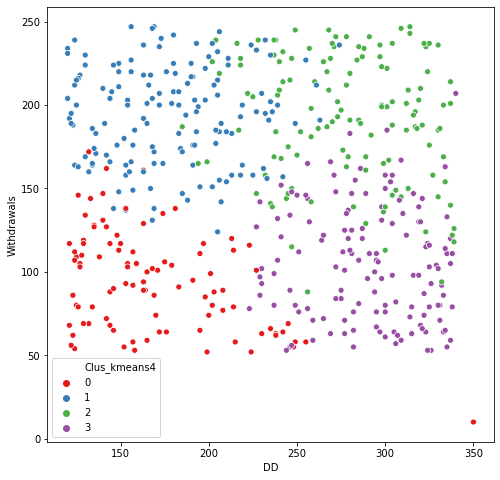

In [35]:
plt.figure(figsize=[8,8])
sns.scatterplot(x="DD",
                y="Withdrawals",
                hue="Clus_kmeans4",
                data=data_df,palette="Set1")
plt.show()

# Some Recommendations

1. The banks in Cluster 3 has high DD and Withdrawals, but less Deposit.  So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.


2. Customers in Cluster 3 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.


3. Customers preferring DD payment can go to banks either in Cluster 3 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 2 (if they want small space where probably quick transaction can happen due to less crowd holding capacity) 


4. Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 2 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.


5. Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.


6. Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.


7. Banks in cluster 1 and 2, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 3 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.


In [36]:
#data_df.to_csv('km.csv')